In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

In [4]:
from GraphBuilder_with_features import GraphBuilder

In [5]:
def test_graphbuilder():
    """Test the GraphBuilder with various graph types"""
    
    print("Testing GraphBuilder with different graph types...\n")
    
    # Test 1: Simple triangle (planar graph)
    print("=" * 50)
    print("Test 1: Simple Triangle Graph")
    print("=" * 50)
    
    triangle_edges = [('A', 'B'), ('B', 'C'), ('C', 'A')]
    triangle_coeff = 0  # Class label
    
    try:
        gb_triangle = GraphBuilder(solid_edges=triangle_edges, coeff=triangle_coeff)
        data_triangle = gb_triangle.build()
        
        print(f"Triangle Graph:")
        print(f"  Number of nodes: {data_triangle.num_nodes}")
        print(f"  Number of edges: {data_triangle.edge_index.shape[1] // 2}")  # Divide by 2 for undirected
        print(f"  Feature dimensions: {data_triangle.x.shape}")
        print(f"  Target label: {data_triangle.y}")
        print(f"  Node features (first node): {data_triangle.x[0, :10]}...")  # First 10 features
        print("✓ Triangle test passed!\n")
        
    except Exception as e:
        print(f"✗ Triangle test failed: {e}\n")
    
    # Test 2: Square grid (planar graph)
    print("=" * 50)
    print("Test 2: Square Grid Graph")
    print("=" * 50)
    
    square_edges = [
        (0, 1), (1, 2), (2, 3), (3, 0),  # Outer square
        (0, 2), (1, 3)  # Diagonals to make it more complex
    ]
    square_coeff = 1
    
    try:
        gb_square = GraphBuilder(solid_edges=square_edges, coeff=square_coeff)
        data_square = gb_square.build()
        
        print(f"Square Grid Graph:")
        print(f"  Number of nodes: {data_square.num_nodes}")
        print(f"  Number of edges: {data_square.edge_index.shape[1] // 2}")
        print(f"  Feature dimensions: {data_square.x.shape}")
        print(f"  Target label: {data_square.y}")
        print("✓ Square grid test passed!\n")
        
    except Exception as e:
        print(f"✗ Square grid test failed: {e}\n")
    
    # Test 3: Complete graph K5 (non-planar)
    print("=" * 50)
    print("Test 3: Complete Graph K5 (Non-planar)")
    print("=" * 50)
    
    k5_nodes = ['A', 'B', 'C', 'D', 'E']
    k5_edges = [(i, j) for i in k5_nodes for j in k5_nodes if i < j]
    k5_coeff = 2
    
    try:
        gb_k5 = GraphBuilder(solid_edges=k5_edges, coeff=k5_coeff)
        data_k5 = gb_k5.build()
        
        print(f"Complete Graph K5:")
        print(f"  Number of nodes: {data_k5.num_nodes}")
        print(f"  Number of edges: {data_k5.edge_index.shape[1] // 2}")
        print(f"  Feature dimensions: {data_k5.x.shape}")
        print(f"  Target label: {data_k5.y}")
        print("✓ K5 test passed!\n")
        
    except Exception as e:
        print(f"✗ K5 test failed: {e}\n")
    
    # Test 4: Linear chain
    print("=" * 50)
    print("Test 4: Linear Chain Graph")
    print("=" * 50)
    
    chain_edges = [(i, i+1) for i in range(5)]  # 0-1-2-3-4-5
    chain_coeff = 3
    
    try:
        gb_chain = GraphBuilder(solid_edges=chain_edges, coeff=chain_coeff)
        data_chain = gb_chain.build()
        
        print(f"Linear Chain Graph:")
        print(f"  Number of nodes: {data_chain.num_nodes}")
        print(f"  Number of edges: {data_chain.edge_index.shape[1] // 2}")
        print(f"  Feature dimensions: {data_chain.x.shape}")
        print(f"  Target label: {data_chain.y}")
        print("✓ Chain test passed!\n")
        
    except Exception as e:
        print(f"✗ Chain test failed: {e}\n")
    
    # Test 5: With extra node features
    print("=" * 50)
    print("Test 5: Triangle with Extra Node Features")
    print("=" * 50)
    
    # Create extra features (3 nodes, 2 features each)
    extra_features = np.random.rand(3, 2)
    
    try:
        gb_extra = GraphBuilder(solid_edges=triangle_edges, coeff=triangle_coeff)
        data_extra = gb_extra.build(extra_node_features=extra_features)
        
        print(f"Triangle with Extra Features:")
        print(f"  Number of nodes: {data_extra.num_nodes}")
        print(f"  Feature dimensions: {data_extra.x.shape}")
        print(f"  Extra features shape: {extra_features.shape}")
        print(f"  Target label: {data_extra.y}")
        print("✓ Extra features test passed!\n")
        
    except Exception as e:
        print(f"✗ Extra features test failed: {e}\n")

def test_batch_processing():
    """Test processing multiple graphs like in your original use case"""
    
    print("=" * 50)
    print("Test 6: Batch Processing (Multiple Graphs)")
    print("=" * 50)
    
    # Create multiple graphs
    edges_list = [
        [('A', 'B'), ('B', 'C'), ('C', 'A')],  # Triangle
        [(0, 1), (1, 2), (2, 0), (0, 3)],      # Triangle with tail
        [('x', 'y'), ('y', 'z'), ('z', 'w'), ('w', 'x')],  # Square
    ]
    
    coeffs = [0, 1, 2]
    
    try:
        # This mimics your original usage pattern
        data_list = []
        for edges, coeff in zip(edges_list, coeffs):
            gb = GraphBuilder(solid_edges=edges, coeff=coeff)
            data = gb.build()
            data_list.append(data)
        
        print(f"Batch Processing Results:")
        for i, data in enumerate(data_list):
            print(f"  Graph {i+1}: {data.num_nodes} nodes, {data.edge_index.shape[1]//2} edges, features: {data.x.shape}")
        
        print("✓ Batch processing test passed!\n")
        
    except Exception as e:
        print(f"✗ Batch processing test failed: {e}\n")

def visualize_graph_features(data, title="Graph"):
    """Visualize a graph and its features"""
    try:
        # Convert to NetworkX for visualization
        G = to_networkx(data, to_undirected=True)
        
        # Create subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # Plot 1: Graph structure
        pos = nx.spring_layout(G)
        nx.draw(G, pos, ax=axes[0], with_labels=True, node_color='lightblue', 
                node_size=500, font_size=10, font_weight='bold')
        axes[0].set_title(f"{title} - Structure")
        
        # Plot 2: Feature heatmap (first few features)
        features_to_show = min(10, data.x.shape[1])
        im = axes[1].imshow(data.x[:, :features_to_show].numpy(), 
                           cmap='viridis', aspect='auto')
        axes[1].set_title(f"{title} - Features (first {features_to_show})")
        axes[1].set_xlabel("Feature Index")
        axes[1].set_ylabel("Node Index")
        plt.colorbar(im, ax=axes[1])
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Visualization failed: {e}")

def detailed_feature_analysis(data, graph_name="Graph"):
    """Analyze the features in detail"""
    print(f"\nDetailed Feature Analysis for {graph_name}:")
    print("-" * 40)
    
    x = data.x.numpy()
    
    # Analyze feature statistics
    print(f"Feature matrix shape: {x.shape}")
    print(f"Feature mean: {np.mean(x):.4f}")
    print(f"Feature std: {np.std(x):.4f}")
    print(f"Feature min: {np.min(x):.4f}")
    print(f"Feature max: {np.max(x):.4f}")
    
    # Check for NaN or infinite values
    nan_count = np.sum(np.isnan(x))
    inf_count = np.sum(np.isinf(x))
    print(f"NaN values: {nan_count}")
    print(f"Infinite values: {inf_count}")
    
    # Analyze feature ranges by groups
    expected_feature_groups = [
        ("Degree", 1),
        ("Face Features", 4),
        ("Spectral Features", 6),
        ("Dual Graph Features", 5),
        ("Centrality Features", 6),
        ("Laplacian Eigenvectors", 4)  # Added by transform
    ]
    
    start_idx = 0
    for group_name, group_size in expected_feature_groups:
        if start_idx + group_size <= x.shape[1]:
            group_features = x[:, start_idx:start_idx + group_size]
            print(f"{group_name}: mean={np.mean(group_features):.4f}, "
                  f"std={np.std(group_features):.4f}")
            start_idx += group_size
        else:
            break


Testing GraphBuilder with different graph types...

Test 1: Simple Triangle Graph
Triangle Graph:
  Number of nodes: 3
  Number of edges: 3
  Feature dimensions: torch.Size([3, 22])
  Target label: 0
  Node features (first node): tensor([2.0000, 1.0000, 3.0000, 3.0000, 0.0000, 3.0000, 3.0000, 3.0000, 0.5077,
        1.0000])...
✓ Triangle test passed!

Test 2: Square Grid Graph
Square Grid Graph:
  Number of nodes: 4
  Number of edges: 6
  Feature dimensions: torch.Size([4, 22])
  Target label: 1
✓ Square grid test passed!

Test 3: Complete Graph K5 (Non-planar)
Complete Graph K5:
  Number of nodes: 5
  Number of edges: 10
  Feature dimensions: torch.Size([5, 26])
  Target label: 2
✓ K5 test passed!

Test 4: Linear Chain Graph
Linear Chain Graph:
  Number of nodes: 6
  Number of edges: 5
  Feature dimensions: torch.Size([6, 26])
  Target label: 3
✓ Chain test passed!

Test 5: Triangle with Extra Node Features
Triangle with Extra Features:
  Number of nodes: 3
  Feature dimensions: torc

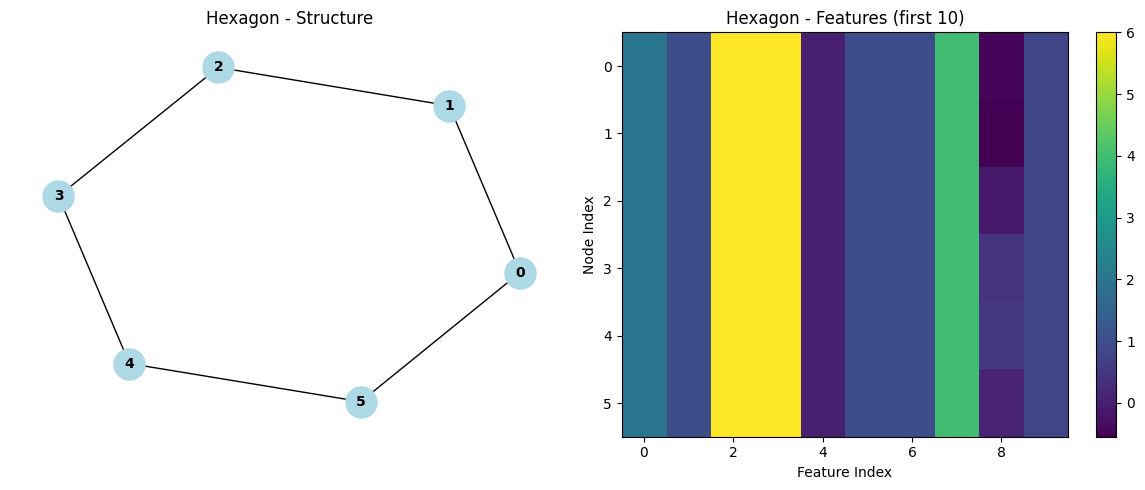


🎉 All tests completed!

To run visualization, uncomment the visualize_graph_features() call.
Make sure you have matplotlib installed: pip install matplotlib


In [7]:
if __name__ == "__main__":
    # Run basic tests
    test_graphbuilder()
    test_batch_processing()
    
    # Create a simple example for detailed analysis
    print("=" * 50)
    print("Detailed Analysis Example")
    print("=" * 50)
    
    # Create a hexagon (planar graph)
    hexagon_edges = [(i, (i+1) % 6) for i in range(6)]
    gb_hex = GraphBuilder(solid_edges=hexagon_edges, coeff=0)
    data_hex = gb_hex.build()
    
    detailed_feature_analysis(data_hex, "Hexagon")
    
    # Uncomment the line below if you want to see visualizations
    visualize_graph_features(data_hex, "Hexagon")
    
    print("\n🎉 All tests completed!")
    print("\nTo run visualization, uncomment the visualize_graph_features() call.")
    print("Make sure you have matplotlib installed: pip install matplotlib")